In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
mk_data=pd.read_csv('/Users/mojgun/Documents/IRONHACK/lab/WEEK1/customer-analysis-round-2/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
#Show the dataframe shape.
display(mk_data)


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
#Standardize header names.

mk_data.columns = list(map(lambda x: x.lower(), mk_data.columns))
mk_data.columns = mk_data.columns.str.replace(" ","_")
display(mk_data)


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
# Change effective to date column to datetime format.

In [5]:
#Which columns are numerical
display(mk_data.select_dtypes(np.number).columns)
test=mk_data.select_dtypes(np.number)
display(test)

#Which columns are categorical?
display(mk_data.select_dtypes('object').columns)


Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [6]:
#Showing the number of all null values in data

nulls_data = mk_data['state'].isna().sum()
display(nulls_data)

631

In [7]:
#Dealing with NaN value in "state"

na_row_indexes=mk_data[mk_data['state'].isna()==True].index
num_of_nas= len(na_row_indexes)

ch=np.array(mk_data[mk_data['state'].isna()==False].iloc[:,2])
for item in na_row_indexes:
    mk_data.iloc[item,2]=np.random.choice(ch,size=1)

In [8]:
#Dealing with NaN value in "response"
mk_data['response'].value_counts()

na_row_indexes=mk_data[mk_data['response'].isna()==True].index
num_of_nas= len(na_row_indexes)

ch=np.array(mk_data[mk_data['response'].isna()==False].iloc[:,4])
for item in na_row_indexes:
    mk_data.iloc[item,4]=np.random.choice(ch,size=1)


In [9]:
#Dealing with NaN value in "months_since_last_claim "

na_row_indexes=mk_data[mk_data['months_since_last_claim'].isna()==True].index
num_of_nas= len(na_row_indexes)

ch=np.array(mk_data[mk_data['months_since_last_claim'].isna()==False].iloc[:,14])
for item in na_row_indexes:
    mk_data.iloc[item,14]=np.random.choice(ch,size=1)
    

In [10]:
#Dealing with NaN value in "number_of_open_complaints "

na_row_indexes=mk_data[mk_data['number_of_open_complaints'].isna()==True].index
num_of_nas= len(na_row_indexes)

ch=np.array(mk_data[mk_data['number_of_open_complaints'].isna()==False].iloc[:,16])
for item in na_row_indexes:
    mk_data.iloc[item,16]=np.random.choice(ch,size=1)

In [11]:
#Dealing with NaN value in "vehicle_size "

na_row_indexes=mk_data[mk_data['vehicle_size'].isna()==True].index
num_of_nas= len(na_row_indexes)

ch=np.array(mk_data[mk_data['vehicle_size'].isna()==False].iloc[:,24])
for item in na_row_indexes:
    mk_data.iloc[item,24]=np.random.choice(ch,size=1)

In [12]:
#Dealing with NaN value in "vehicle_type "

mk_data['vehicle_type'] = list(map(lambda x: 'A', mk_data['vehicle_type']))


In [13]:
#Datetime format - Extract the months from the dataset and store in a separate column.

mk_data['effective_to_date'] = pd.to_datetime(mk_data['effective_to_date'], errors='coerce')

mk_data['month'] = pd.to_datetime(mk_data['effective_to_date']).dt.month

newdf = mk_data.loc[(mk_data.month == 1)|(mk_data.month == 2)|(mk_data.month == 3)]


In [14]:
# importing Clean customer data
mk_data_clean=pd.read_csv('/Users/mojgun/Documents/IRONHACK/lab/WEEK1/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')


In [15]:
#Show DataFrame info
mk_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [16]:
#Standardize header names.

mk_data_clean.columns = list(map(lambda x: x.lower(), mk_data_clean.columns))
mk_data_clean.columns = mk_data_clean.columns.str.replace(" ","_")
display(mk_data_clean)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
#Describe DataFrame.
mk_data_clean.describe()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


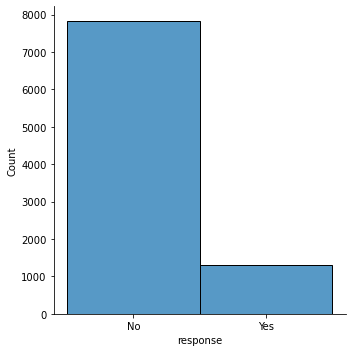

In [18]:
#Show a plot of the total number of responses.

sns.displot(mk_data_clean["response"])


,sales_channel,NO,YES,Rate
0,Agent,2811.0,666.0,0.19
1,Branch,2273.0,294.0,0.11
2,Call Center,1573.0,192.0,0.11
3,Web,1169.0,156.0,0.12


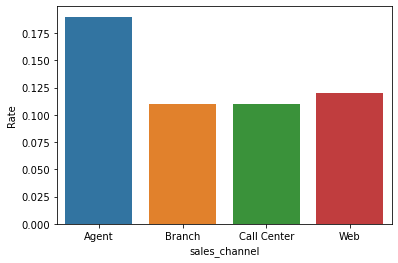

,sales_channel,NO,YES,Rate
0,Agent,2811.0,666.0,0.19
1,Branch,2273.0,294.0,0.11
2,Call Center,1573.0,192.0,0.11
3,Web,1169.0,156.0,0.12


In [19]:
#Show a plot of the response rate by the sales channel.
test=mk_data_clean[['response','sales_channel']]
r_s = (pd.get_dummies(test, columns=['response']).groupby('sales_channel', as_index=False).sum())

r_s=r_s.rename(columns={'response_No':'NO','response_Yes':'YES'})
r_s['Rate']=round(r_s['YES']/(r_s['NO']+r_s['YES']),2)

display(r_s)
sns.barplot(data=r_s, x='sales_channel',y='Rate')

plt.show()
display(r_s)
#plt.title('Response rate by channels')


,response,total_claim_amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


,total_claim_amount,response
response,,
Rate_yes,0.15,yes
Rate_No,0.85,no


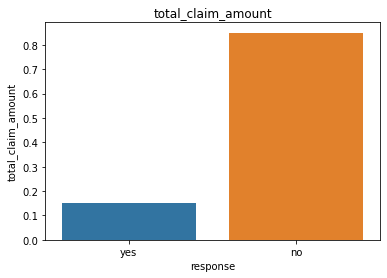

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [20]:
#Show a plot of the response rate by the total claim amount.

test1=mk_data_clean[['response','total_claim_amount']]
display(test1)
r_c = pd.DataFrame(test1.groupby(['response']).sum())
r_c=pd.DataFrame(r_c.T)
r_c['Rate_yes']=round(r_c['Yes']/(r_c['No']+r_c['Yes']),2)
r_c['Rate_No']=round(r_c['No']/(r_c['No']+r_c['Yes']),2)
r_c=r_c.drop(['No','Yes'], axis=1)
r_c=pd.DataFrame(r_c.T)
r_c['response']='yes'
r_c.iloc[1,1]='no'
display(r_c)
sns.barplot(data=r_c, x='response',y='total_claim_amount')
plt.title('total_claim_amount')
plt.show()
plt.show()


display(mk_data_clean)


,total_claim_amount
response,
No,3.381493e+06
Yes,5.834738e+05


,total_claim_amount,response
response,,
Rate_yes,0.15,yes
Rate_No,0.85,no


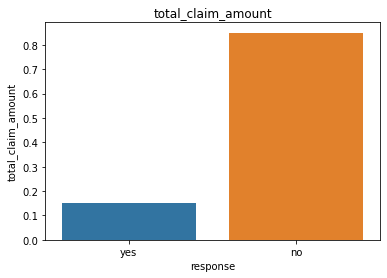

In [21]:
test1=mk_data_clean[['response','total_claim_amount']]
r_c = pd.DataFrame(test1.groupby(['response']).sum())
display(r_c)
r_c=pd.DataFrame(r_c.T)
r_c['Rate_yes']=round(r_c['Yes']/(r_c['No']+r_c['Yes']),2)
r_c['Rate_No']=round(r_c['No']/(r_c['No']+r_c['Yes']),2)
r_c=r_c.drop(['No','Yes'], axis=1)
r_c=pd.DataFrame(r_c.T)
r_c['response']='yes'
r_c.iloc[1,1]='no'
display(r_c)
sns.barplot(data=r_c, x='response',y='total_claim_amount')
plt.title('total_claim_amount')
plt.show()
plt.show()


,income,response
0,48029,No
1,0,No
2,22139,No
3,49078,Yes
4,23675,No
...,...,...
10905,0,No
10906,61146,No
10907,39837,No
10908,64195,No


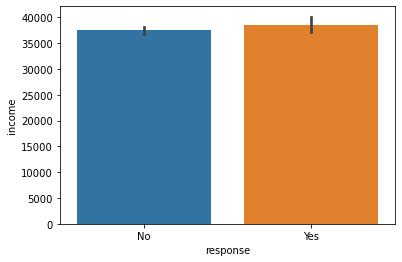

0       56274
1           0
2       48767
3           0
4       43836
        ...  
9129    71941
9130    21604
9131        0
9132    21941
9133        0
Name: income, Length: 9134, dtype: int64

In [22]:
#Show a plot of the response rate by income.
test2=mk_data[['income','response']]
display(test2)

sum_=mk_data['income'].sum()
r_i = pd.DataFrame((test1.groupby(['response']).sum())/sum_*100)



sns.barplot(data=mk_data_clean, y='income', x='response')
plt.show()

display(mk_data_clean['income'])


In [23]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

numerical = mk_data_clean.select_dtypes(np.number)
display(numerical)

#Which columns are categorical?
categorical = mk_data_clean.select_dtypes('object')
display(mk_data_clean)



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


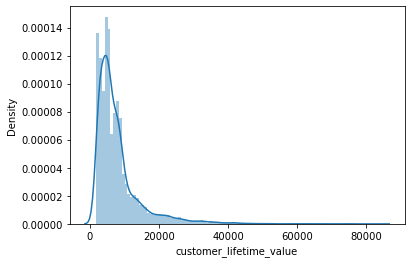

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


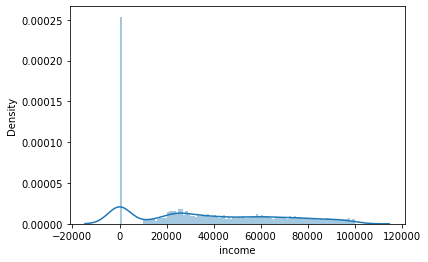

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


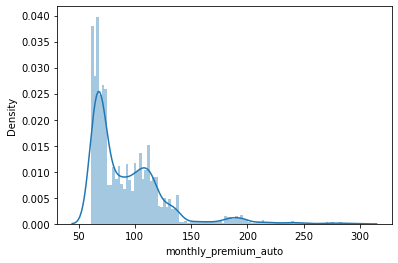

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


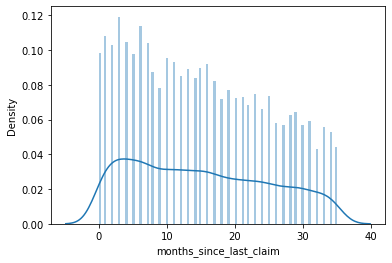

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


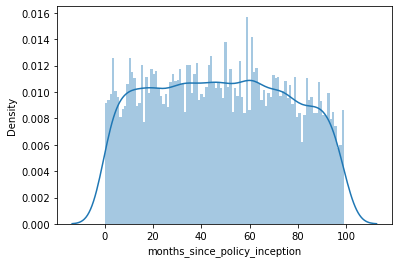

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


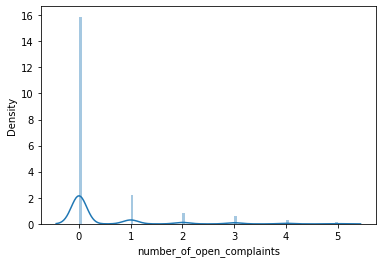

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


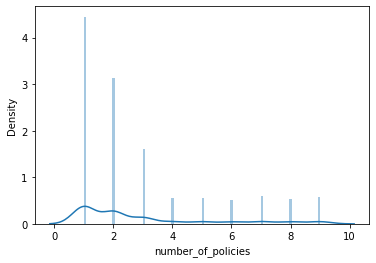

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


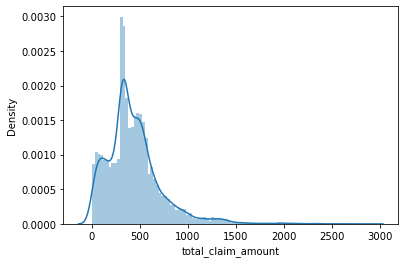

In [24]:
#Use seaborn library to construct distribution plots for the numerical variables

for col in numerical:
    sns.distplot(numerical[col],bins= 100)
    plt.show()


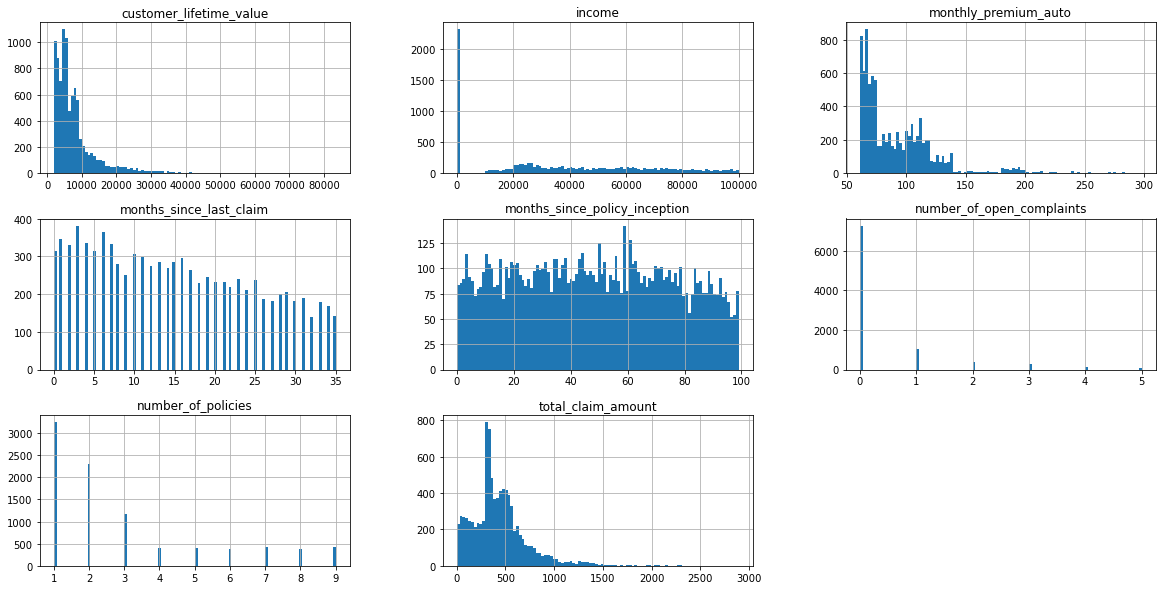

In [25]:
#Use Matplotlib to construct histograms
numerical.hist(bins=100, figsize=(20,10))
plt.show()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


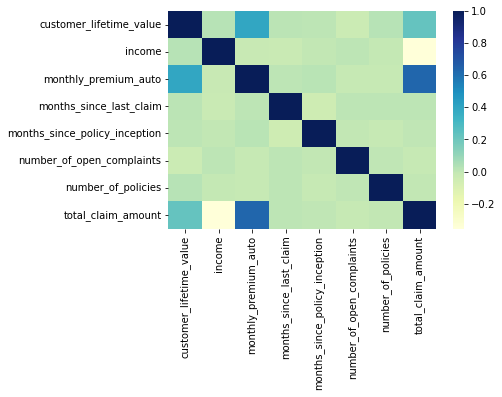

In [26]:
#For the numerical variables, check the multicollinearity 
#between the features. Please note that we will use the column total_claim_amount later as the target variable.
cor_matrix = numerical.corr()
display(cor_matrix)
sns.heatmap(cor_matrix ,cmap="YlGnBu")
plt.show()


In [27]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features


#There is no pair of features with correlation higher than 0.9


In [56]:
#X-y split.
Y = numerical[['total_claim_amount']]
X = numerical[['monthly_premium_auto','income']]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   monthly_premium_auto  9134 non-null   int64
 1   income                9134 non-null   int64
dtypes: int64(2)
memory usage: 142.8 KB


In [43]:
#Normalize (numerical).
from sklearn.preprocessing import MinMaxScaler 

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X)
x_normalized = MinMaxtransformer.transform(X) 
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=X.columns) 
x_normalized.head()

x_normalized.shape

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (9134, 2)


(9134, 2)

In [30]:
cat=categorical.drop(['customer','effective_to_date'],axis=1)

cat['state'].value_counts()

#first use lower to lower all values in state column
# the Number of nevada and Washington is low so i combine them as one value so quantity of them be like the others

def cleanstate(x):
    x = x.lower()
    if 'nevada' in x:
        return "nv-wa"
    elif 'washington' in x:
        return "nv-wa"
    else:
        return x
    
cat['state']=cat['state'].apply(cleanstate)
cat['state'].value_counts()



california    3150
oregon        2601
arizona       1703
nv-wa         1680
Name: state, dtype: int64

In [31]:
# Dealing with data in coverage
cat['coverage'].value_counts()
# becuse the number of premium is low in coverage we drop all related rows
cat.drop(cat.index[cat['coverage'] == 'Premium'], inplace=True)


In [32]:
# Dealing with data in education
#number of doctor and master are low so we will drop them
cat.drop(cat.index[cat['education'] == 'Master'], inplace=True)
cat.drop(cat.index[cat['education'] == 'Doctor'], inplace=True)
cat['education'].value_counts()

Bachelor                2498
College                 2455
High School or Below    2361
Name: education, dtype: int64

In [33]:
cat['employmentstatus'].value_counts()
# we drop disabled and retired as one value becuase the number of them are low
cat.drop(cat.index[cat['employmentstatus']=='Disabled'],inplace=True)
cat.drop(cat.index[cat['employmentstatus']=='Medical Leave'],inplace=True)
cat.drop(cat.index[cat['employmentstatus']=='Retired'],inplace=True)

cat['employmentstatus'].value_counts()


Employed      4433
Unemployed    1975
Name: employmentstatus, dtype: int64

In [34]:
#cat['location_code'].value_counts()
# the number of rural and urban are far from subrban so we combine those two
def clean_location(x):
    if 'Rural' in x:
        return 'other'
    elif'Urban' in x:
        return 'other'
    else:
        return x
cat['location_code']=cat['location_code'].apply(clean_location)
cat['location_code'].value_counts()


Suburban    3945
other       2463
Name: location_code, dtype: int64

In [35]:
# remove those columns which i think dosent have any impact 
cat=cat.drop('response', axis=1)
cat.head()


,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,nv-wa,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
3,california,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,nv-wa,Basic,Bachelor,Employed,M,other,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,oregon,Basic,Bachelor,Employed,F,other,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [36]:

cat['marital_status'].value_counts()
#remove the marital becuse the frequncies of them are very diffrent
cat=cat.drop('marital_status', axis=1)


In [37]:
# remove Special Auto becuase its frequency is very low

cat.drop(cat.index[cat['policy_type'] == 'Special Auto'], inplace=True)

cat['policy_type'].value_counts()


Personal Auto     4726
Corporate Auto    1412
Name: policy_type, dtype: int64

In [38]:
cat['policy'].value_counts()
# replace all coprate with one value
def poliy_co(x):
    if "Corporate" in x:
        return "Corporate"
    else:
        return x
cat['policy']=cat['policy'].apply(poliy_co)
# remove personal l1
cat.drop(cat.index[cat['policy']=='Personal L1'], inplace=True)
cat['policy'].value_counts()



Personal L3    2401
Personal L2    1450
Corporate      1412
Name: policy, dtype: int64

In [39]:
cat['renew_offer_type'].value_counts()
# we will consider offer34 for affer 3 and offer 4


Offer1    2024
Offer2    1756
Offer3     850
Offer4     633
Name: renew_offer_type, dtype: int64

In [42]:
#One Hot/Label Encoding (categorical).
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder.fit(cat)
X_cat_encoded = encoder.transform(cat).toarray()
cols = encoder.get_feature_names(input_features=cat.columns)
X_encoded_df = pd.DataFrame(X_cat_encoded, columns=cols)
X_encoded_df.shape



/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5263, 25)

In [57]:
x_normalized=pd.DataFrame(x_normalized,index=X_encoded_df.index)
Y=pd.DataFrame(Y,index=X_encoded_df.index)

In [58]:
x_normalized.shape

(5263, 2)

In [59]:
X_encoded_df.shape

(5263, 25)

In [60]:
# concat Data Frames
X_scaled= np.concatenate([X_encoded_df,x_normalized], axis=1)


In [61]:
X_scaled.shape

(5263, 27)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=20)



# Regression Model

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred= lm.predict(X_test)

# Model Validation

In [68]:
#R2
r2_score_test = r2_score(y_pred, y_test)
print(r2_score_test)

-0.12062504627618797


In [71]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error_test=mean_absolute_error(y_pred, y_test)
print(mean_squared_error_test)

150.60339313094875


In [73]:
#RMSE
r2_mean_squared_error_test=np.sqrt(mean_absolute_error(y_pred, y_test))
print(r2_mean_squared_error_test)

12.272057412306575


In [74]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error_test=mean_absolute_error(y_pred, y_test)
print(mean_absolute_error_test)

150.60339313094875
